In [1]:
# Importing dependencies 
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
import numpy as np

/Users/EricShaffer/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/EricShaffer/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/EricShaffer/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Use

In [2]:
# load in the zoo animal dataset
zoo_animals = pd.read_csv("data/zoo_animals.csv")
zoo_animals.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
zoo_animals = zoo_animals.drop(columns=['animal name'])

In [4]:
X = zoo_animals.iloc[:,:-1]
Y = zoo_animals.iloc[:,-1]

In [5]:
y = Y - 1

In [6]:
print(X.shape)
print(y.shape)

(101, 16)
(101,)


In [8]:
y.max()

6

In [9]:
# Split data into train and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
# scaling our data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [11]:
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
 # One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
 

In [14]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [15]:
len(y_train_categorical[0])

7

In [16]:
from tensorflow.keras.layers import Dense
number_inputs = X.shape[1]
number_hidden_nodes = 4 * number_inputs
model.add(Dense(units=number_hidden_nodes,activation='relu', input_dim=number_inputs))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [17]:
model.add(Dense(units=len(y_train_categorical[0]), activation='softmax'))

In [18]:
# model summary
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1088      
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 455       
Total params: 1,543
Trainable params: 1,543
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
 # Fit (train) the model
history = model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
75/75 - 0s - loss: 2.1351 - acc: 0.0400
Epoch 2/100
75/75 - 0s - loss: 2.0014 - acc: 0.1867
Epoch 3/100
75/75 - 0s - loss: 1.8813 - acc: 0.2667
Epoch 4/100
75/75 - 0s - loss: 1.7655 - acc: 0.3067
Epoch 5/100
75/75 - 0s - loss: 1.6586 - acc: 0.3333
Epoch 6/100
75/75 - 0s - loss: 1.5570 - acc: 0.4800
Epoch 7/100
75/75 - 0s - loss: 1.4597 - acc: 0.6000
Epoch 8/100
75/75 - 0s - loss: 1.3725 - acc: 0.6667
Epoch 9/100
75/75 - 0s - loss: 1.2865 - acc: 0.6800
Epoch 10/100
75/75 - 0s - loss: 1.2079 - acc: 0.6800
Epoch 11/100
75/75 - 0s - loss: 1.1326 - acc: 0.6800
Epoch 12/100
75/75 - 0s - loss: 1.0643 - acc: 0.7067
Epoch 13/100
75/75 - 0s - loss: 1.0002 - acc: 0.7333
Epoch 14/100
75/75 - 0s - loss: 0.9396 - acc: 0.7467
Epoch 15/100
75/75 - 0s - loss: 0.8869 - acc: 0.7867
Epoch 16/100
75/75 - 0s - loss: 0.8347 - acc: 0.7867
Epoch 17/100
75/75 - 0s - loss: 0.7869 - acc: 0.8133
Epoch 18/100
75/75 - 0s - loss: 0.7439 - acc: 0.8267
Epoch 19/100
75/75 - 0s - loss: 0.7028 - acc: 0.8400
Ep

In [21]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

26/26 - 0s - loss: 0.0915 - acc: 1.0000
Loss: 0.09154745191335678, Accuracy: 1.0


In [22]:
print(history.history.keys())

dict_keys(['loss', 'acc'])


In [23]:
import matplotlib.pyplot as plt

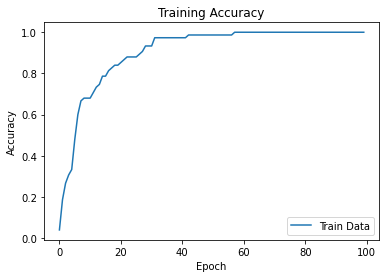

In [24]:
#creating a plot to display accurancy over each epoch
plt.plot(history.history['acc'])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Data'], loc='lower right')
plt.show()